In [62]:
from astropy.io import fits
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt

In [63]:
readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav")['lgtaxis']

array([5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. ], dtype='>f4')

In [24]:
readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav").keys()

dict_keys(['emcube', 'statuscube', 'lgtaxis', 'ax', 'ay', 'adata', 'wave'])

In [64]:
readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav")['emcube'].shape

(16, 793, 793)

In [67]:
fits.open("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits")[0].data.shape

(16, 395, 793)

In [65]:
fits.open("output/full_data/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.2_wpsf.fits")[0].data.shape

(19, 793, 395)

In [306]:
fits.open("output/full_data/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.2_wpsf.fits")[1].data

FITS_rec([( 2, 5.7), ( 3, 5.8), ( 4, 5.9), ( 5, 6. ), ( 6, 6.1),
          ( 7, 6.2), ( 8, 6.3), ( 9, 6.4), (10, 6.5), (11, 6.6),
          (12, 6.7), (13, 6.8), (14, 6.9), (15, 7. ), (16, 7.1),
          (17, 7.2), (18, 7.3), (19, 7.4), (20, 7.5)],
         dtype=(numpy.record, [('index', '>i2'), ('logt', '>f4')]))

In [308]:
fits.open("output/test/em_data_cube_x2_1.0_1e-05_wpsf.fits")[1].data

FITS_rec([( 2, 5.7), ( 3, 5.8), ( 4, 5.9), ( 5, 6. ), ( 6, 6.1),
          ( 7, 6.2), ( 8, 6.3), ( 9, 6.4), (10, 6.5), (11, 6.6),
          (12, 6.7), (13, 6.8)],
         dtype=(numpy.record, [('index', '>i2'), ('logt', '>f4')]))

In [164]:
fits.open("output/full_data_fewer_temps/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.01_wpsf.fits")[0].data.shape

(12, 793, 395)

In [309]:
fits.writeto("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.fits", 
             np.transpose(readsav("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.sav")['emcube'], (0, 2, 1))[2:-2],
             #fits.open("output/test/em_data_cube_x2_1.0_1e-05_wpsf.fits")[0].header,
             overwrite=True)

In [310]:
# a = np.rec.array([( 2, 5.5), ( 3, 5.6), ( 4, 5.7), ( 5, 5.8), ( 6, 5.9),
#                   ( 7, 6. ), ( 8, 6.1), ( 9, 6.2), (10, 6.3), (11, 6.4),
#                   (12, 6.5), (13, 6.6), (14, 6.7), (15, 6.8), (16, 6.9),
#                   (17, 7. )], formats='>i2,>f4', names='index,logt')
a = np.rec.array([( 2, 5.7), ( 3, 5.8), ( 4, 5.9), ( 5, 6. ), ( 6, 6.1),
          ( 7, 6.2), ( 8, 6.3), ( 9, 6.4), (10, 6.5), (11, 6.6),
          (12, 6.7), (13, 6.8)], formats='>i2,>f4', names='index,logt')
fits.append("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.fits", a)

In [311]:
hdul = fits.open("data/ECCCO_speedtest_runs/emcube_2011-02-15T01_45.fits")
hdul[0].data = np.mean([hdul[0].data[:, :, ::2][:,:, :-2],  
                        hdul[0].data[:, :, 1::2][:,:, :-1]], axis=0)[:, ::-1, :]
hdul.writeto("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits", overwrite=True)

In [312]:
fits.open("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits")[0].data.shape

(12, 793, 395)

In [313]:
fits.open("output/photons/combined_ECCCO_trim_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.2_wpsf.fits")[0].data.shape

(12, 793, 395)

In [314]:
fits.open("output/test/em_data_cube_x2_1.0_1e-05_wpsf.fits")[0].data.shape

(12, 793, 395)

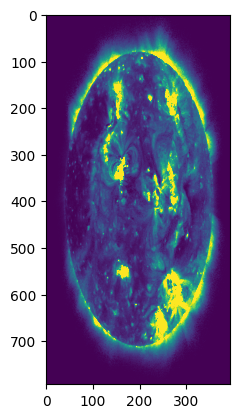

In [319]:
fig, ax = plt.subplots()
ax.imshow(fits.open("data/ECCCO_speedtest_runs/combined_ECCCO_sw_lw_s_i_scaled_em_data_cube_x2_1.0_0.005_wpsf.fits")[0].data[5], vmin=0, vmax=5)


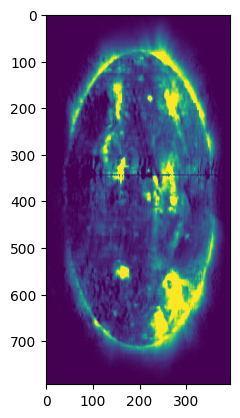

In [320]:
fig, ax = plt.subplots()
ax.imshow(fits.open("output/test/em_data_cube_x2_1.0_1e-05_wpsf.fits")[0].data[5], vmin=0, vmax=5)
